<a href="https://colab.research.google.com/github/surf0123/python/blob/main/ddd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 손글씨 분류하기

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


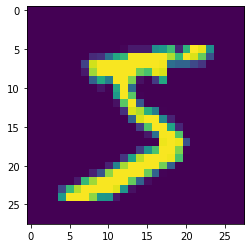

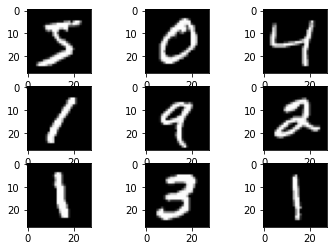

In [39]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

plt.imshow(X_train[0])
plt.show()

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [40]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [41]:
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [42]:
model = Sequential()  # 모델 선언
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))
model.add(Dense(y_train.shape[1], activation="softmax"))

# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08662549406290054
print("정확도:", acc)  # 정확도: 0.9779999852180481

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2828 - acc: 0.9195 - val_loss: 0.1580 - val_acc: 0.9542
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1256 - acc: 0.9624 - val_loss: 0.1114 - val_acc: 0.9672
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0856 - acc: 0.9743 - val_loss: 0.1055 - val_acc: 0.9675
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0632 - acc: 0.9816 - val_loss: 0.0958 - val_acc: 0.9706
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0474 - acc: 0.9858 - val_loss: 0.0937 - val_acc: 0.9728
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0374 - acc: 0.9881 - val_loss: 0.0967 - val_acc: 0.9738
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0297 - acc: 0.9911 - val_loss: 0.0865 - val_acc: 0.9753
Epoch 8/10
1500/1500 [==============================] - 4s 3ms

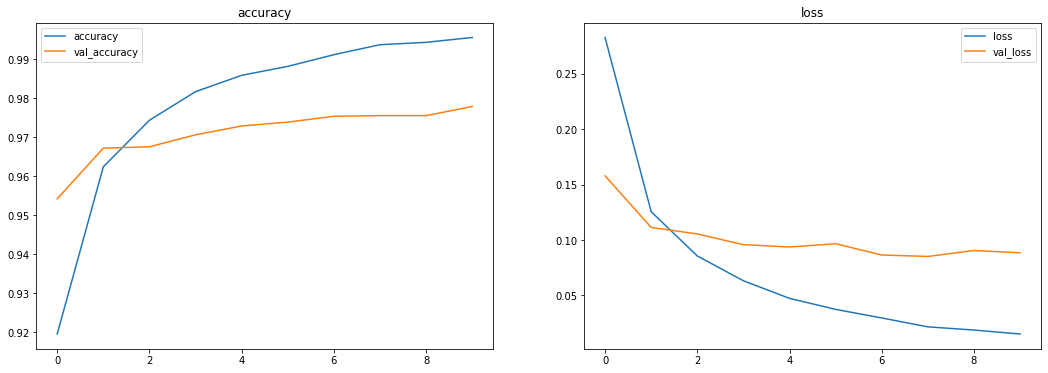

In [44]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [45]:
#model.save("저장할 모델의 위치.h5")
#loaded_model = load_model("저장한 모델의 위치.h5")

In [51]:
#y = model.predict(X_train)

#print(y)

z = model.predict(X_train)

print(z)

[[6.32659157e-15 4.63981013e-13 2.36235209e-08 ... 3.50038093e-14
  4.25281338e-12 2.06804662e-09]
 [1.00000000e+00 1.40791607e-13 3.28900143e-08 ... 1.03029425e-11
  2.55402551e-13 7.55367227e-11]
 [1.20842641e-10 2.45830414e-08 1.99742990e-05 ... 1.69530881e-06
  2.56658581e-07 1.16265731e-07]
 ...
 [1.03145167e-14 7.71140860e-11 1.92074529e-14 ... 1.25867563e-14
  8.87397444e-09 2.75193059e-07]
 [5.24996096e-07 3.38413186e-09 1.58492853e-07 ... 4.63213734e-09
  1.18807575e-09 3.93950622e-10]
 [2.86289370e-09 1.10751746e-11 5.94971610e-08 ... 1.36964429e-09
  9.99999523e-01 3.05656357e-07]]


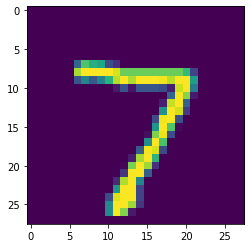

real: 7


In [54]:
plt.imshow(X_test[0].reshape(28, 28))  
plt.show()
print("real:", y_test[0].argmax())  # 7
#pred = model.predict_classes(X_train[:1])  # 다중분류이므로, predict_classes